In [1]:
# Lets see what these numbers look like.

# Read the file

# Shove the numbers into a matrix (rows, columns)

# display


In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np


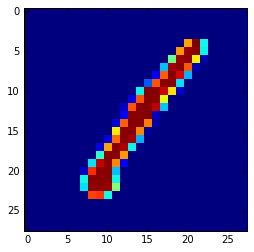

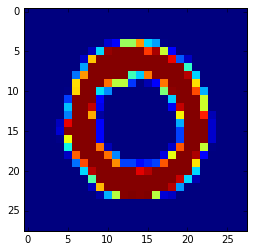

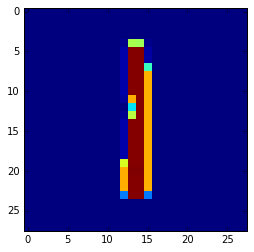

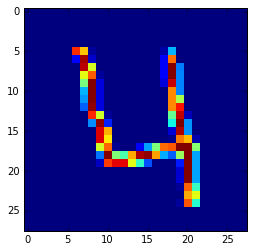

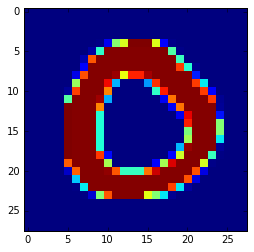

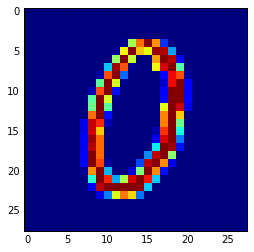

In [13]:
# Read the file

with open(r'C:\Projects\spicenumbers\train.csv', 'r') as train_file:
    for idx, line in enumerate(train_file):
        if idx == 0:
            continue
        
        columns = [x.strip() for x in line.split(',')]
        
        label = columns[0]
        img_data = columns[1:]
 
        data = np.zeros( (28,28), dtype=np.uint8)
        for row in range(28):
            data[row,:] = img_data[row*28:row*28 + 28]

        plt.imshow(data, interpolation='nearest')
        plt.show()
        
        if idx > 5:
            break

        
        



In [ ]:
# given  a bunch of label examples ( the actual number label, the picture) 

In [15]:
from sklearn.ensemble import RandomForestClassifier

with open(r'C:\Projects\spicenumbers\train.csv', 'r') as train_file:
    
    all_data =  np.zeros( (42000, 785), dtype=np.uint8)
      
    for idx, line in enumerate(train_file):
        if idx == 0:
            continue 
        columns = [x.strip() for x in line.split(',')]
        all_data[idx-1,:] = columns
        
      


In [17]:
def display_num(raw):
    data = np.zeros( (28,28), dtype=np.uint8)
    for row in range(28):
        data[row,:] = raw[row*28:row*28 + 28]

    plt.imshow(data, interpolation='nearest')
    plt.show()

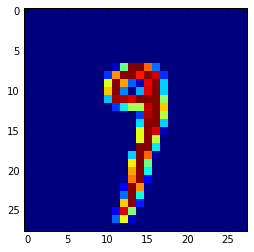

In [30]:
display_num(all_data[-86,1:])

In [44]:
clf = RandomForestClassifier(n_estimators=10, 
                             max_depth=None, 
                             min_samples_split=2, 
                             random_state=0)

In [56]:
img = all_data[:-41500,1:]
target = all_data[:-41500,0]
clf.fit(img,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [57]:
predictions = clf.predict(all_data[-41500:,1:])

In [58]:
accuracy = sum( [1 for idx, prediction in enumerate(predictions) if all_data[-41500+idx,0] == prediction]) 

In [59]:
accuracy

30398

In [60]:
accuracy/41500.

0.7324819277108434